In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cp=pd.read_csv('cp.csv')
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
cp

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


#features detail
1. N nitrogen ratio in the soil
2. K potassium ratio in the soil
3. P phosphurous ratio in the soil
4. Temperature in the Celsius 
5. humidity in the %
6. ph value in the soil
7. raonfall in the mm
8. label value as per the prediction

In [4]:
#printing of the labels
cp['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [5]:
X=cp.drop('label', axis=1)
y=cp['label']

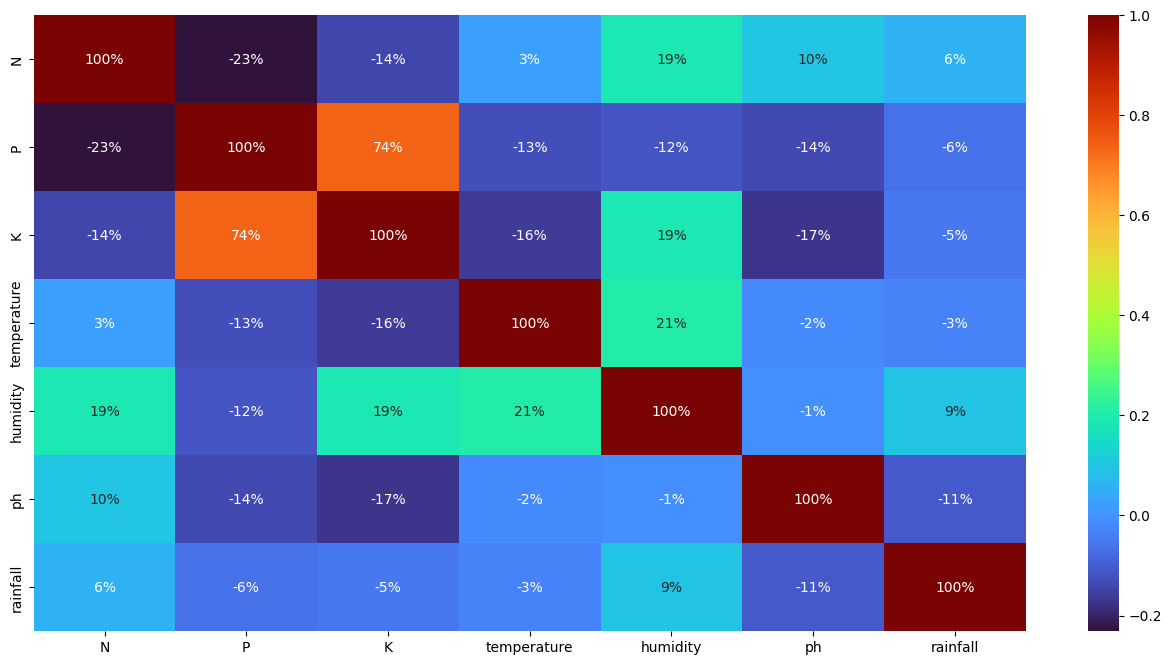

In [6]:
#maping of the heatmap
plt.figure(figsize=(16,8))
sns.heatmap(X.corr(), annot=True, cmap='turbo', fmt = '.0%')
plt.show()

<Figure size 1600x800 with 0 Axes>

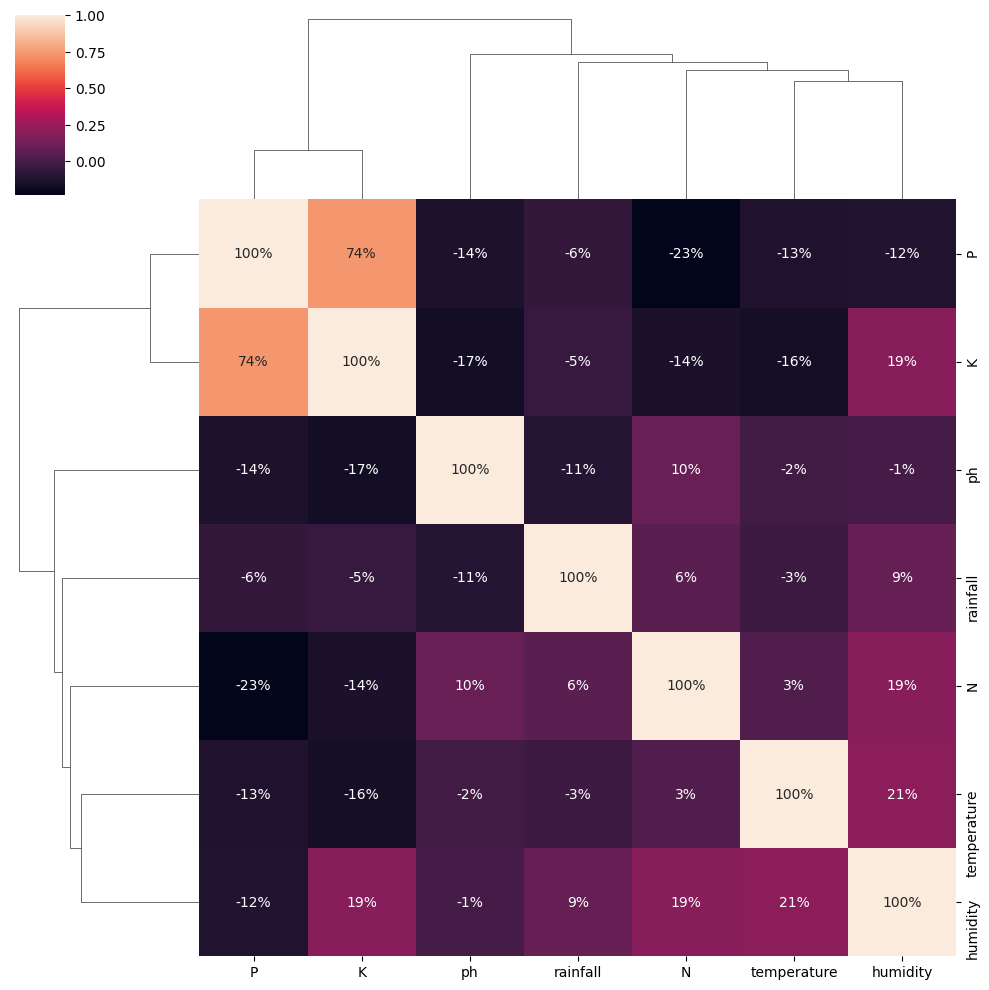

In [7]:
plt.figure(figsize=(16,8))
sns.clustermap(X.corr(), annot=True, fmt = '.0%')
plt.show()

In [8]:
# pd.DataFrame(index='index',
#             column =cp.drop())
cp.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
pd.pivot_table(cp,index='label', 
              columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'])

label
apple
banana
blackgram
chickpea
coconut
coffee
cotton
grapes
jute
kidneybeans


In [10]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [12]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((1760, 7), (440, 7), (1760,), (440,))

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [14]:
log_clf=LogisticRegression()
log_clf.fit(X_train, Y_train)

c:\Users\devan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred=log_clf.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
print("accuracy score is :- ", accuracy_score(Y_test, y_pred)*100)

accuracy score is :-  94.54545454545455


In [18]:
svc_clf = SVC()
svc_clf.fit(X_train, Y_train)


SVC()

In [19]:
y_pred=svc_clf.predict(X_test)
y_pred

array(['muskmelon', 'watermelon', 'papaya', 'papaya', 'apple', 'mango',
       'apple', 'mothbeans', 'mungbean', 'lentil', 'blackgram', 'coconut',
       'pomegranate', 'jute', 'coconut', 'pomegranate', 'apple', 'cotton',
       'papaya', 'muskmelon', 'coffee', 'papaya', 'orange', 'papaya',
       'chickpea', 'jute', 'mungbean', 'orange', 'pigeonpeas', 'jute',
       'pomegranate', 'lentil', 'jute', 'lentil', 'jute', 'blackgram',
       'jute', 'chickpea', 'chickpea', 'kidneybeans', 'papaya', 'mango',
       'blackgram', 'maize', 'mungbean', 'maize', 'pigeonpeas', 'coconut',
       'muskmelon', 'maize', 'blackgram', 'coffee', 'grapes', 'mungbean',
       'coffee', 'kidneybeans', 'cotton', 'apple', 'banana', 'blackgram',
       'watermelon', 'coconut', 'lentil', 'orange', 'papaya', 'blackgram',
       'orange', 'rice', 'muskmelon', 'pigeonpeas', 'muskmelon',
       'coconut', 'jute', 'banana', 'blackgram', 'papaya', 'banana',
       'cotton', 'watermelon', 'orange', 'coffee', 'chickpea'

In [20]:
cp

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [21]:
import numpy as np
i = np.array([107, 34, 32, 26.774637, 66.413269, 6.780064, 177.774507]).reshape(1,-1)
i

array([[107.      ,  34.      ,  32.      ,  26.774637,  66.413269,
          6.780064, 177.774507]])

In [22]:
import numpy as np
i2 = np.array([17, 134, 367, 2.774637, 90.413269, 62.780064, 17.774507]).reshape(1,-1)
i2

array([[ 17.      , 134.      , 367.      ,   2.774637,  90.413269,
         62.780064,  17.774507]])

In [23]:
i

array([[107.      ,  34.      ,  32.      ,  26.774637,  66.413269,
          6.780064, 177.774507]])

In [24]:
y_pred=svc_clf.predict(i2)
y_pred[0]

c:\Users\devan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


'papaya'

In [25]:
# print("accuracy score--- is:- ", accuracy_score(Y_test, y_pred)*100)

In [26]:
import pickle as pkl

In [27]:
# pkl.dump(svc_clf, open("svc_clf.pkl", "wb"))

In [28]:
def pred(n,p,k,t,h,ph,rf):
            model=pkl.load(open('svc_clf.pkl','rb'))
            return model.predict([[n,p,k,t,h,ph,rf]])[0]
        
ans = pred(1,1,1,1,1,1,1)

c:\Users\devan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [29]:
ans

'mothbeans'